In [30]:
import torch
import torchvision.datasets as datasets
import torchvision

device = "cuda" if torch.cuda.is_available() else "cpu"

In [31]:
mnist_trainset = datasets.MNIST(root='.', train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

In [32]:
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.mnist import Encoder_ResNet_VAE_MNIST, Decoder_ResNet_AE_MNIST

In [43]:
# config = BaseTrainerConfig(
#     output_dir='my_model_nih',
#     learning_rate=1e-4,
#     batch_size=100,
#     num_epochs=10, # Change this to train the model a bit more
# )


# model_config = VAEConfig(
#     input_dim=(224, 224, 1),
#     latent_dim=128
# )

# model = VAE(
#     model_config=model_config,
#     encoder=Encoder_ResNet_VAE_MNIST(model_config), 
#     decoder=Decoder_ResNet_AE_MNIST(model_config) 
# )

config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    batch_size=256,
    num_epochs=50, # Change this to train the model a bit more
)


model_config = VAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=16
)

model = VAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_MNIST(model_config), 
    decoder=Decoder_ResNet_AE_MNIST(model_config) 
)

In [38]:
import math
import random
import numpy as np
from torch.utils.data import random_split

print("Traversing Image Directory..")
img_list = np.load("/media/data_cifs/anagara8/8_video_frame_list.npy") # os.listdir(data_dir)
random.seed(42)
random.shuffle(img_list)
img_list = img_list[:640]
print("Done!")

Traversing Image Directory..
Done!


In [44]:
mnist_trainset = datasets.MNIST(root='.', train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

In [22]:
import cv2

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, img_list, augmentations = None):
        super(MyDataset, self).__init__()
        self.img_list = img_list
        self.augmentations = augmentations
    
    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img_name = self.img_list[idx]
        img = cv2.imread("/media/data_cifs/anagara8/video_processed_frames/"+img_name)
        img = img[:, :, 1]
        
        img = torch.tensor(img).float()/255.0
#         img = transform_norm(img)
        img = torch.unsqueeze(img, 0)
#         img = torch.permute(img, (2, 1, 0))
#         print(img.shape)
        return {"data":img}


# In[8]:


m=len(img_list)

print("Length:",m, "-> Training set size:", int(math.ceil(m-m*0.2)), "| Validation set size:", int(m*0.2))
train_data, val_data = random_split(img_list, [int(math.ceil(m-m*0.2)), int(m*0.2)])


# In[9]:


batch_size=64
train_set_loader = torch.utils.data.DataLoader(MyDataset(train_data), batch_size=batch_size, num_workers = 4, shuffle=True)
valid_set_loader = torch.utils.data.DataLoader(MyDataset(val_data), batch_size=batch_size, num_workers = 4, shuffle=True)

Length: 640 -> Training set size: 512 | Validation set size: 128


In [23]:
train_data[0]

'video_2018Y_08M_13D_12h_01m_43s_cam_17202346frame91317.jpg'

In [45]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [46]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !

Created my_model/VAE_training_2022-09-16_09-13-01. 
Training config, checkpoints and final model will be saved here.

Successfully launched training !



Training Shape: torch.Size([1, 28, 28])
Model: VAE(
  (decoder): Decoder_ResNet_AE_MNIST(
    (layers): ModuleList(
      (0): Linear(in_features=16, out_features=2048, bias=True)
      (1): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): Sequential(
        (0): ResBlock(
          (conv_block): Sequential(
            (0): ReLU()
            (1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (2): ReLU()
            (3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
          )
        )
        (1): ResBlock(
          (conv_block): Sequential(
            (0): ReLU()
            (1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (2): ReLU()
            (3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
          )
        )
        (2): ReLU()
      )
      (3): Sequential(
        (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_


Training of epoch 1/50:  99%|█████████████▊| 194/196 [00:02<00:00, 56.83batch/s]

Eval of epoch 1/50:   0%|                             | 0/40 [00:00<?, ?batch/s]

Eval of epoch 1/50: 100%|███████████████████| 40/40 [00:00<00:00, 201.80batch/s]
--------------------------------------------------------------------------
Train loss: 76.1168
Eval loss: 51.2642
--------------------------------------------------------------------------

Training of epoch 2/50:  98%|█████████████▋| 192/196 [00:02<00:00, 51.91batch/s]

Eval of epoch 2/50:   0%|                             | 0/40 [00:00<?, ?batch/s]

Eval of epoch 2/50: 100%|███████████████████| 40/40 [00:00<00:00, 213.38batch/s]
--------------------------------------------------------------------------
Train loss: 44.3784
Eval loss: 38.1874
--------------------------------------------------------------------------

Training of epoch 3/50: 100%|██████████████| 196/196 [00:04<00:00, 47.46batch/s]

Eval of epoch 3/50:   0%|                      

Train loss: 36.0557
Eval loss: 34.4767
--------------------------------------------------------------------------

Training of epoch 4/50:  98%|█████████████▋| 192/196 [00:03<00:00, 44.49batch/s]

Eval of epoch 4/50:   0%|                             | 0/40 [00:00<?, ?batch/s]

Eval of epoch 4/50: 100%|███████████████████| 40/40 [00:00<00:00, 204.73batch/s]
--------------------------------------------------------------------------
Train loss: 33.6316
Eval loss: 32.834
--------------------------------------------------------------------------

Training of epoch 5/50:  98%|█████████████▊| 193/196 [00:04<00:00, 48.72batch/s]

Eval of epoch 5/50:   0%|                             | 0/40 [00:00<?, ?batch/s]

Eval of epoch 5/50: 100%|███████████████████| 40/40 [00:00<00:00, 206.70batch/s]
--------------------------------------------------------------------------
Train loss: 32.522
Eval loss: 31.94
--------------------------------------------------------------------------

Training of epoch 6

Training of epoch 6/50:  98%|█████████████▋| 192/196 [00:04<00:00, 45.70batch/s]

Eval of epoch 6/50:   0%|                             | 0/40 [00:00<?, ?batch/s]

Eval of epoch 6/50: 100%|███████████████████| 40/40 [00:00<00:00, 199.67batch/s]
--------------------------------------------------------------------------
Train loss: 31.8492
Eval loss: 31.5786
--------------------------------------------------------------------------

Training of epoch 7/50:  98%|█████████████▊| 193/196 [00:04<00:00, 45.09batch/s]

Eval of epoch 7/50:   0%|                             | 0/40 [00:00<?, ?batch/s]

Eval of epoch 7/50: 100%|███████████████████| 40/40 [00:00<00:00, 257.75batch/s]
--------------------------------------------------------------------------
Train loss: 31.3907
Eval loss: 31.0069
--------------------------------------------------------------------------

Training of epoch 8/50:  77%|██████████▋   | 150/196 [00:03<00:01, 43.81batch/s]


Training of epoch 8/50:  99%|█████████████▊| 194/196 [00:04<00:00, 47.60batch/s]

Eval of epoch 8/50:   0%|                             | 0/40 [00:00<?, ?batch/s]

Eval of epoch 8/50:  48%|█████████          | 19/40 [00:00<00:00, 183.01batch/s]

Eval of epoch 8/50: 100%|███████████████████| 40/40 [00:00<00:00, 179.83batch/s]
--------------------------------------------------------------------------
Train loss: 31.0193
Eval loss: 30.7104
--------------------------------------------------------------------------

Training of epoch 9/50:  98%|█████████████▊| 193/196 [00:04<00:00, 43.93batch/s]

Eval of epoch 9/50:   0%|                             | 0/40 [00:00<?, ?batch/s]

Eval of epoch 9/50: 100%|███████████████████| 40/40 [00:00<00:00, 200.42batch/s]
--------------------------------------------------------------------------
Train loss: 30.7223
Eval loss: 30.5023
--------------------------------------------------------------------------

Training of epoch 10/50:  99%|████████████▊| 194

Eval of epoch 10/50: 100%|██████████████████| 40/40 [00:00<00:00, 248.08batch/s]
--------------------------------------------------------------------------
Train loss: 30.4459
Eval loss: 30.3159
--------------------------------------------------------------------------

Training of epoch 11/50: 100%|█████████████| 196/196 [00:04<00:00, 42.63batch/s]

Eval of epoch 11/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 11/50:  40%|███████▏          | 16/40 [00:00<00:00, 159.77batch/s]

Eval of epoch 11/50: 100%|██████████████████| 40/40 [00:00<00:00, 163.03batch/s]
--------------------------------------------------------------------------
Train loss: 30.2839
Eval loss: 30.1529
--------------------------------------------------------------------------

Training of epoch 12/50:  98%|████████████▊| 193/196 [00:04<00:00, 42.16batch/s]

Eval of epoch 12/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 12/50: 100%|██████████████████| 40

Training of epoch 13/50:  99%|████████████▉| 195/196 [00:04<00:00, 46.24batch/s]

Eval of epoch 13/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 13/50:  42%|███████▋          | 17/40 [00:00<00:00, 168.43batch/s]

Eval of epoch 13/50: 100%|██████████████████| 40/40 [00:00<00:00, 182.82batch/s]
--------------------------------------------------------------------------
Train loss: 29.8746
Eval loss: 29.7447
--------------------------------------------------------------------------

Training of epoch 14/50:  99%|████████████▊| 194/196 [00:03<00:00, 44.96batch/s]

Eval of epoch 14/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 14/50: 100%|██████████████████| 40/40 [00:00<00:00, 212.56batch/s]
--------------------------------------------------------------------------
Train loss: 29.7342
Eval loss: 29.5942
--------------------------------------------------------------------------

Training of epoch 15/50:  57%|███████▍     | 112

Training of epoch 15/50:  98%|████████████▊| 193/196 [00:04<00:00, 43.21batch/s]

Eval of epoch 15/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 15/50: 100%|██████████████████| 40/40 [00:00<00:00, 218.46batch/s]
--------------------------------------------------------------------------
Train loss: 29.6221
Eval loss: 29.4389
--------------------------------------------------------------------------

Training of epoch 16/50:  99%|████████████▊| 194/196 [00:04<00:00, 36.79batch/s]

Eval of epoch 16/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 16/50: 100%|██████████████████| 40/40 [00:00<00:00, 220.25batch/s]
--------------------------------------------------------------------------
Train loss: 29.4797
Eval loss: 29.2299
--------------------------------------------------------------------------

Training of epoch 17/50:  87%|███████████▎ | 170/196 [00:03<00:00, 46.44batch/s]


Training of epoch 17/50: 100%|█████████████| 196/196 [00:04<00:00, 44.61batch/s]

Eval of epoch 17/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 17/50: 100%|██████████████████| 40/40 [00:00<00:00, 223.92batch/s]
--------------------------------------------------------------------------
Train loss: 29.3924
Eval loss: 29.2866
--------------------------------------------------------------------------

Training of epoch 18/50:  98%|████████████▋| 192/196 [00:04<00:00, 44.50batch/s]

Eval of epoch 18/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 18/50: 100%|██████████████████| 40/40 [00:00<00:00, 217.48batch/s]
--------------------------------------------------------------------------
Train loss: 29.2617
Eval loss: 29.0968
--------------------------------------------------------------------------

Training of epoch 19/50: 100%|█████████████| 196/196 [00:04<00:00, 43.78batch/s]

Eval of epoch 19/50:   0%|                      


Training of epoch 20/50:  99%|████████████▊| 194/196 [00:03<00:00, 55.57batch/s]

Eval of epoch 20/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 20/50:  40%|███████▏          | 16/40 [00:00<00:00, 158.86batch/s]

Eval of epoch 20/50: 100%|██████████████████| 40/40 [00:00<00:00, 168.33batch/s]
--------------------------------------------------------------------------
Train loss: 29.0711
Eval loss: 28.8804
--------------------------------------------------------------------------

Training of epoch 21/50:  99%|████████████▉| 195/196 [00:02<00:00, 50.02batch/s]

Eval of epoch 21/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 21/50: 100%|██████████████████| 40/40 [00:00<00:00, 213.51batch/s]
--------------------------------------------------------------------------
Train loss: 28.9954
Eval loss: 28.8357
--------------------------------------------------------------------------

Training of epoch 22/50:  77%|█████████▉   | 15

Training of epoch 22/50: 100%|█████████████| 196/196 [00:04<00:00, 48.46batch/s]

Eval of epoch 22/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 22/50: 100%|██████████████████| 40/40 [00:00<00:00, 224.87batch/s]
--------------------------------------------------------------------------
Train loss: 28.8822
Eval loss: 28.8349
--------------------------------------------------------------------------

Training of epoch 23/50:  99%|████████████▉| 195/196 [00:04<00:00, 51.96batch/s]

Eval of epoch 23/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 23/50: 100%|██████████████████| 40/40 [00:00<00:00, 259.64batch/s]
--------------------------------------------------------------------------
Train loss: 28.8226
Eval loss: 28.643
--------------------------------------------------------------------------

Training of epoch 24/50:  99%|████████████▊| 194/196 [00:04<00:00, 45.62batch/s]

Eval of epoch 24/50:   0%|                       

Eval of epoch 24/50: 100%|██████████████████| 40/40 [00:00<00:00, 227.08batch/s]
--------------------------------------------------------------------------
Train loss: 28.7394
Eval loss: 28.669
--------------------------------------------------------------------------

Training of epoch 25/50:  99%|████████████▉| 195/196 [00:04<00:00, 46.93batch/s]

Eval of epoch 25/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 25/50: 100%|██████████████████| 40/40 [00:00<00:00, 214.83batch/s]
--------------------------------------------------------------------------
Train loss: 28.6462
Eval loss: 28.533
--------------------------------------------------------------------------

Training of epoch 26/50:  99%|████████████▊| 194/196 [00:04<00:00, 42.05batch/s]

Eval of epoch 26/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 26/50: 100%|██████████████████| 40/40 [00:00<00:00, 234.98batch/s]
---------------------------------------------------

Training of epoch 27/50:  99%|████████████▉| 195/196 [00:04<00:00, 45.73batch/s]

Eval of epoch 27/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 27/50: 100%|██████████████████| 40/40 [00:00<00:00, 237.47batch/s]
--------------------------------------------------------------------------
Train loss: 28.533
Eval loss: 28.4228
--------------------------------------------------------------------------

Training of epoch 28/50:  99%|████████████▉| 195/196 [00:04<00:00, 46.61batch/s]

Eval of epoch 28/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 28/50:  42%|███████▋          | 17/40 [00:00<00:00, 164.86batch/s]

Eval of epoch 28/50: 100%|██████████████████| 40/40 [00:00<00:00, 161.87batch/s]
--------------------------------------------------------------------------
Train loss: 28.4821
Eval loss: 28.4692
--------------------------------------------------------------------------

Training of epoch 29/50:  69%|█████████    | 136/

Training of epoch 29/50:  97%|████████████▋| 191/196 [00:04<00:00, 44.48batch/s]

Eval of epoch 29/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 29/50: 100%|██████████████████| 40/40 [00:00<00:00, 201.29batch/s]
--------------------------------------------------------------------------
Train loss: 28.4322
Eval loss: 28.3235
--------------------------------------------------------------------------

Training of epoch 30/50:  99%|████████████▊| 194/196 [00:04<00:00, 43.57batch/s]

Eval of epoch 30/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 30/50: 100%|██████████████████| 40/40 [00:00<00:00, 212.70batch/s]
--------------------------------------------------------------------------
Train loss: 28.3711
Eval loss: 28.2448
--------------------------------------------------------------------------

Training of epoch 31/50: 100%|█████████████| 196/196 [00:04<00:00, 47.38batch/s]

Eval of epoch 31/50:   0%|                      

Eval of epoch 31/50: 100%|██████████████████| 40/40 [00:00<00:00, 218.22batch/s]
--------------------------------------------------------------------------
Train loss: 28.2942
Eval loss: 28.2248
--------------------------------------------------------------------------

Training of epoch 32/50: 100%|█████████████| 196/196 [00:04<00:00, 43.27batch/s]

Eval of epoch 32/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 32/50: 100%|██████████████████| 40/40 [00:00<00:00, 204.04batch/s]
--------------------------------------------------------------------------
Train loss: 28.2042
Eval loss: 28.1541
--------------------------------------------------------------------------

Training of epoch 33/50: 100%|█████████████| 196/196 [00:04<00:00, 44.79batch/s]

Eval of epoch 33/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 33/50: 100%|██████████████████| 40/40 [00:00<00:00, 200.85batch/s]
-------------------------------------------------

Training of epoch 34/50:  98%|████████████▊| 193/196 [00:04<00:00, 45.24batch/s]

Eval of epoch 34/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 34/50: 100%|██████████████████| 40/40 [00:00<00:00, 203.73batch/s]
--------------------------------------------------------------------------
Train loss: 28.1009
Eval loss: 27.9975
--------------------------------------------------------------------------

Training of epoch 35/50:  98%|████████████▋| 192/196 [00:04<00:00, 43.00batch/s]

Eval of epoch 35/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 35/50: 100%|██████████████████| 40/40 [00:00<00:00, 246.68batch/s]
--------------------------------------------------------------------------
Train loss: 28.093
Eval loss: 28.0139
--------------------------------------------------------------------------

Training of epoch 36/50:  60%|███████▊     | 118/196 [00:02<00:01, 49.78batch/s]


Training of epoch 36/50:  98%|████████████▊| 193/196 [00:03<00:00, 48.48batch/s]

Eval of epoch 36/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 36/50:  45%|████████          | 18/40 [00:00<00:00, 176.17batch/s]

Eval of epoch 36/50: 100%|██████████████████| 40/40 [00:00<00:00, 164.67batch/s]
--------------------------------------------------------------------------
Train loss: 28.0314
Eval loss: 27.9689
--------------------------------------------------------------------------

Training of epoch 37/50:  98%|████████████▋| 192/196 [00:04<00:00, 44.15batch/s]

Eval of epoch 37/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 37/50: 100%|██████████████████| 40/40 [00:00<00:00, 191.01batch/s]
--------------------------------------------------------------------------
Train loss: 28.0181
Eval loss: 27.9266
--------------------------------------------------------------------------

Training of epoch 38/50:  93%|████████████▏| 183

Training of epoch 38/50:  99%|████████████▊| 194/196 [00:04<00:00, 47.98batch/s]

Eval of epoch 38/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 38/50: 100%|██████████████████| 40/40 [00:00<00:00, 211.41batch/s]
--------------------------------------------------------------------------
Train loss: 27.9502
Eval loss: 28.0095
--------------------------------------------------------------------------

Training of epoch 39/50:  98%|████████████▋| 192/196 [00:04<00:00, 48.51batch/s]

Eval of epoch 39/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 39/50:  45%|████████          | 18/40 [00:00<00:00, 177.57batch/s]

Eval of epoch 39/50: 100%|██████████████████| 40/40 [00:00<00:00, 181.31batch/s]
--------------------------------------------------------------------------
Train loss: 27.9183
Eval loss: 27.8511
--------------------------------------------------------------------------

Training of epoch 40/50:  99%|████████████▉| 195

Training of epoch 41/50:  99%|████████████▉| 195/196 [00:04<00:00, 45.83batch/s]

Eval of epoch 41/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 41/50: 100%|██████████████████| 40/40 [00:00<00:00, 204.63batch/s]
--------------------------------------------------------------------------
Train loss: 27.845
Eval loss: 27.905
--------------------------------------------------------------------------

Training of epoch 42/50:  97%|████████████▋| 191/196 [00:04<00:00, 50.88batch/s]

Eval of epoch 42/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 42/50: 100%|██████████████████| 40/40 [00:00<00:00, 202.78batch/s]
--------------------------------------------------------------------------
Train loss: 27.772
Eval loss: 27.7925
--------------------------------------------------------------------------

Training of epoch 43/50:  46%|██████▍       | 90/196 [00:01<00:02, 44.13batch/s]


Training of epoch 43/50:  98%|████████████▋| 192/196 [00:04<00:00, 46.53batch/s]

Eval of epoch 43/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 43/50: 100%|██████████████████| 40/40 [00:00<00:00, 223.69batch/s]
--------------------------------------------------------------------------
Train loss: 27.771
Eval loss: 27.7234
--------------------------------------------------------------------------

Training of epoch 44/50:  98%|████████████▊| 193/196 [00:03<00:00, 48.65batch/s]

Eval of epoch 44/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 44/50: 100%|██████████████████| 40/40 [00:00<00:00, 239.86batch/s]
--------------------------------------------------------------------------
Train loss: 27.728
Eval loss: 27.6843
--------------------------------------------------------------------------

Training of epoch 45/50:  93%|████████████ | 182/196 [00:03<00:00, 45.91batch/s]


Training of epoch 45/50:  98%|████████████▋| 192/196 [00:04<00:00, 43.34batch/s]

Eval of epoch 45/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 45/50: 100%|██████████████████| 40/40 [00:00<00:00, 141.44batch/s]
--------------------------------------------------------------------------
Train loss: 27.6936
Eval loss: 27.6502
--------------------------------------------------------------------------

Training of epoch 46/50: 100%|█████████████| 196/196 [00:04<00:00, 45.94batch/s]

Eval of epoch 46/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 46/50:  50%|█████████         | 20/40 [00:00<00:00, 197.48batch/s]

Eval of epoch 46/50: 100%|██████████████████| 40/40 [00:00<00:00, 186.12batch/s]
--------------------------------------------------------------------------
Train loss: 27.6557
Eval loss: 27.6212
--------------------------------------------------------------------------

Training of epoch 47/50:  98%|████████████▋| 192

Training of epoch 48/50:  96%|████████████▍| 188/196 [00:03<00:00, 77.19batch/s]

Eval of epoch 48/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 48/50: 100%|██████████████████| 40/40 [00:00<00:00, 273.74batch/s]
--------------------------------------------------------------------------
Train loss: 27.6085
Eval loss: 27.5587
--------------------------------------------------------------------------

Training of epoch 49/50:  97%|████████████▋| 191/196 [00:03<00:00, 55.93batch/s]

Eval of epoch 49/50:   0%|                            | 0/40 [00:00<?, ?batch/s]

Eval of epoch 49/50:  48%|████████▌         | 19/40 [00:00<00:00, 189.04batch/s]

Eval of epoch 49/50: 100%|██████████████████| 40/40 [00:00<00:00, 182.81batch/s]
--------------------------------------------------------------------------
Train loss: 27.6021
Eval loss: 27.5274
--------------------------------------------------------------------------

Training of epoch 50/50: 100%|█████████████| 196

Eval of epoch 50/50: 100%|██████████████████| 40/40 [00:00<00:00, 180.24batch/s]
--------------------------------------------------------------------------
Train loss: 27.5521
Eval loss: 27.4628
--------------------------------------------------------------------------
Training ended!
Saved final model in my_model/VAE_training_2022-09-16_09-13-01/final_model


In [47]:
import os
from pythae.models import AutoModel

In [48]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [49]:
from pythae.samplers import NormalSampler

In [50]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [51]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [52]:
import matplotlib.pyplot as plt

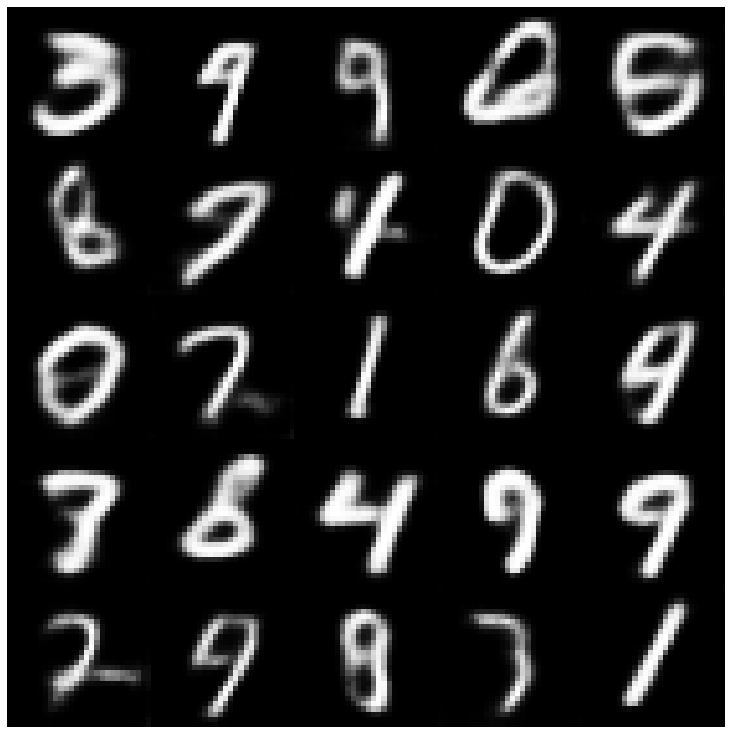

In [53]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

# New Start

In [4]:
from pythae.pipelines import TrainingPipeline
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig

In [5]:
my_training_config = BaseTrainerConfig(
    output_dir='my_model',
    num_epochs=20,
    learning_rate=1e-3,
    batch_size=128,
    steps_saving=None
)

In [6]:
my_vae_config = model_config = VAEConfig(
input_dim=(224, 224, 1),
latent_dim=256
)

In [7]:
my_vae_model = VAE(
model_config=my_vae_config
)

In [8]:
pipeline = TrainingPipeline(
training_config=my_training_config,
model=my_vae_model
)

In [48]:
pipeline(
    train_data=MyDataset(train_data),
    eval_data=MyDataset(val_data)
)

Checking train dataset...
Checking eval dataset...
Using Base Trainer



Training Shape: torch.Size([1, 224, 224])


Model passed sanity check !

Created my_model/VAE_training_2022-09-15_03-04-37. 
Training config, checkpoints and final model will be saved here.

Successfully launched training !



Model: VAE(
  (decoder): Decoder_AE_MLP(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=256, out_features=512, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=512, out_features=50176, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (encoder): Encoder_VAE_MLP(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=50176, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (embedding): Linear(in_features=512, out_features=256, bias=True)
    (log_var): Linear(in_features=512, out_features=256, bias=True)
  )
)


Eval of epoch 1/20: 100%|██████████████████████| 1/1 [00:00<00:00,  1.15batch/s]
--------------------------------------------------------------------------
Train loss: 4376491080.9305
Eval loss: 643637376.0
--------------------------------------------------------------------------
Eval of epoch 2/20: 100%|██████████████████████| 1/1 [00:00<00:00,  1.20batch/s]
--------------------------------------------------------------------------
Train loss: 485916532.0
Eval loss: 21301552.0
--------------------------------------------------------------------------
Eval of epoch 3/20: 100%|██████████████████████| 1/1 [00:00<00:00,  1.23batch/s]
--------------------------------------------------------------------------
Train loss: 5237219.0901
Eval loss: 8509.6465
--------------------------------------------------------------------------
Eval of epoch 4/20: 100%|██████████████████████| 1/1 [00:00<00:00,  1.48batch/s]
--------------------------------------------------------------------------
Train lo

Train loss: 5254.3169
Eval loss: 5210.5278
--------------------------------------------------------------------------
Eval of epoch 17/20: 100%|█████████████████████| 1/1 [00:00<00:00,  1.11batch/s]
--------------------------------------------------------------------------
Train loss: 5083.7365
Eval loss: 4926.4727
--------------------------------------------------------------------------
Eval of epoch 18/20: 100%|█████████████████████| 1/1 [00:00<00:00,  1.20batch/s]
--------------------------------------------------------------------------
Train loss: 4874.139
Eval loss: 4771.2529
--------------------------------------------------------------------------
Eval of epoch 19/20: 100%|█████████████████████| 1/1 [00:00<00:00,  1.22batch/s]
--------------------------------------------------------------------------
Train loss: 4703.9208
Eval loss: 4637.9248
--------------------------------------------------------------------------
Eval of epoch 20/20: 100%|█████████████████████| 1/1 [00:00<0

In [49]:
import os
from pythae.models import AutoModel

In [50]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [51]:
from pythae.samplers import NormalSampler

In [52]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [53]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [54]:
import matplotlib.pyplot as plt

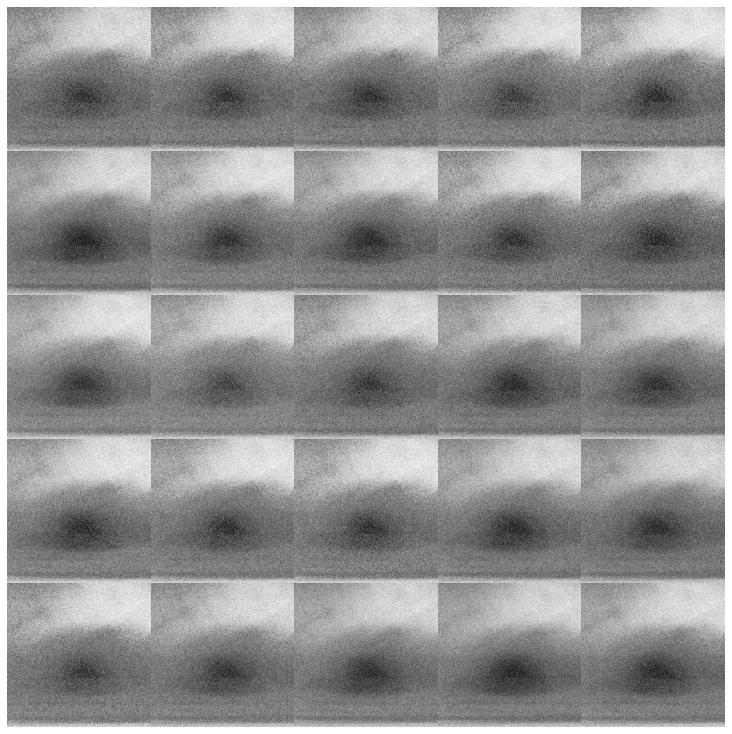

In [55]:
# show results with normal sampler
#256
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

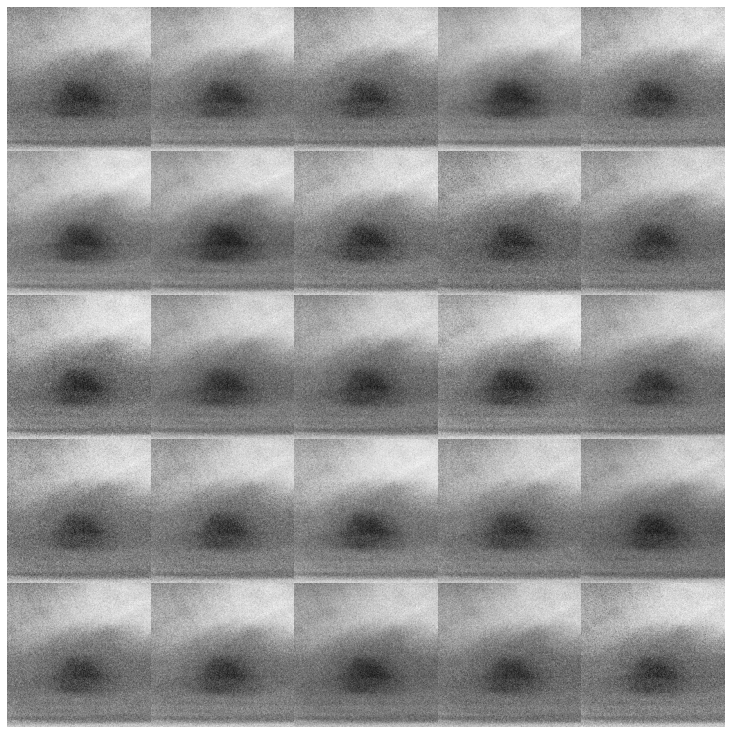

In [44]:
# show results with normal sampler
#128
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [28]:
batch = next(iter(train_set_loader))
yhat = my_vae_model(batch)

In [29]:
from torchviz import make_dot

make_dot(yhat, params=dict(list(my_vae_model.named_parameters()))).render("rnn_torchviz", format="png")

TypeError: unhashable type: 'ModelOutput'

In [55]:
""" MODEL  """
import torch.nn as nn
class Encoder(nn.Module):
    def __init__(self, NUM_FEATURES, hidden_size_layer_1, hidden_size_layer_2, dropout_encoder):
        super(Encoder, self).__init__()
        
        self.input_size = NUM_FEATURES
        self.hidden_size = hidden_size_layer_1
        self.hidden_size_2 = hidden_size_layer_2
        self.n_layers  = 2 
        self.dropout   = dropout_encoder
        self.bidirectional = True
        
        self.encoder_rnn = nn.GRU(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.n_layers,
                            bias=True, batch_first=True, dropout=self.dropout, bidirectional=self.bidirectional)#UNRELEASED!
    
        
        self.hidden_factor = (2 if self.bidirectional else 1) * self.n_layers
        
    def forward(self, inputs):        
        outputs_1, hidden_1 = self.encoder_rnn(inputs)#UNRELEASED!
        
        hidden = torch.cat((hidden_1[0,...], hidden_1[1,...], hidden_1[2,...], hidden_1[3,...]),1)
        
        return hidden
    
    
class Lambda(nn.Module):
    def __init__(self,ZDIMS, hidden_size_layer_1, hidden_size_layer_2, softplus):
        super(Lambda, self).__init__()
        
        self.hid_dim = hidden_size_layer_1*4
        self.latent_length = ZDIMS
        self.softplus = softplus
        
        self.hidden_to_mean = nn.Linear(self.hid_dim, self.latent_length)
        self.hidden_to_logvar = nn.Linear(self.hid_dim, self.latent_length)
        
        if self.softplus == True:
            print("Using a softplus activation to ensures that the variance is parameterized as non-negative and activated by a smooth function")
            self.softplus_fn = nn.Softplus()
        
    def forward(self, hidden):
        
        self.mean = self.hidden_to_mean(hidden)
        if self.softplus == True:
            self.logvar = self.softplus_fn(self.hidden_to_logvar(hidden))
        else:
            self.logvar = self.hidden_to_logvar(hidden)
        
        if self.training:
            std = torch.exp(0.5 * self.logvar)
            eps = torch.randn_like(std)
            return eps.mul(std).add_(self.mean), self.mean, self.logvar
        else:
            return self.mean, self.mean, self.logvar

      
class Decoder(nn.Module):
    def __init__(self,TEMPORAL_WINDOW,ZDIMS,NUM_FEATURES, hidden_size_rec, dropout_rec):
        super(Decoder,self).__init__()
        
        self.num_features = NUM_FEATURES
        self.sequence_length = TEMPORAL_WINDOW
        self.hidden_size = hidden_size_rec
        self.latent_length = ZDIMS
        self.n_layers  = 1
        self.dropout   = dropout_rec
        self.bidirectional = True
        
        self.rnn_rec = nn.GRU(self.latent_length, hidden_size=self.hidden_size, num_layers=self.n_layers,
                            bias=True, batch_first=True, dropout=self.dropout, bidirectional=self.bidirectional)
        
        self.hidden_factor = (2 if self.bidirectional else 1) * self.n_layers # NEW
        
        self.latent_to_hidden = nn.Linear(self.latent_length,self.hidden_size * self.hidden_factor) # NEW
        self.hidden_to_output = nn.Linear(self.hidden_size*(2 if self.bidirectional else 1), self.num_features)
        
    def forward(self, inputs, z):
        batch_size = inputs.size(0) # NEW
        
        hidden = self.latent_to_hidden(z) # NEW
        
        hidden = hidden.view(self.hidden_factor, batch_size, self.hidden_size) # NEW
        
        decoder_output, _ = self.rnn_rec(inputs, hidden)
        prediction = self.hidden_to_output(decoder_output)
        
        return prediction
    
    
class Decoder_Future(nn.Module):
    def __init__(self,TEMPORAL_WINDOW,ZDIMS,NUM_FEATURES,FUTURE_STEPS, hidden_size_pred, dropout_pred):
        super(Decoder_Future,self).__init__()
        
        self.num_features = NUM_FEATURES
        self.future_steps = FUTURE_STEPS
        self.sequence_length = TEMPORAL_WINDOW
        self.hidden_size = hidden_size_pred
        self.latent_length = ZDIMS
        self.n_layers  = 1
        self.dropout   = dropout_pred
        self.bidirectional = True
        
        self.rnn_pred = nn.GRU(self.latent_length, hidden_size=self.hidden_size, num_layers=self.n_layers,
                            bias=True, batch_first=True, dropout=self.dropout, bidirectional=self.bidirectional)
        
        self.hidden_factor = (2 if self.bidirectional else 1) * self.n_layers # NEW
        
        self.latent_to_hidden = nn.Linear(self.latent_length,self.hidden_size * self.hidden_factor)
        self.hidden_to_output = nn.Linear(self.hidden_size*2, self.num_features)
        
    def forward(self, inputs, z):
        batch_size = inputs.size(0)
        
        hidden = self.latent_to_hidden(z)
        hidden = hidden.view(self.hidden_factor, batch_size, self.hidden_size)
        
        inputs = inputs[:,:self.future_steps,:]
        decoder_output, _ = self.rnn_pred(inputs, hidden)
        
        prediction = self.hidden_to_output(decoder_output)
         
        return prediction


class RNN_VAE(nn.Module):
    def __init__(self,TEMPORAL_WINDOW,ZDIMS,NUM_FEATURES,FUTURE_DECODER,FUTURE_STEPS, hidden_size_layer_1, 
                        hidden_size_layer_2, hidden_size_rec, hidden_size_pred, dropout_encoder, 
                        dropout_rec, dropout_pred, softplus):
        super(RNN_VAE,self).__init__()
        
        self.FUTURE_DECODER = FUTURE_DECODER
        self.seq_len = int(TEMPORAL_WINDOW / 2)
        self.encoder = Encoder(NUM_FEATURES, hidden_size_layer_1, hidden_size_layer_2, dropout_encoder)
        self.lmbda = Lambda(ZDIMS, hidden_size_layer_1, hidden_size_layer_2, softplus)
        self.decoder = Decoder(self.seq_len,ZDIMS,NUM_FEATURES, hidden_size_rec, dropout_rec)
        if FUTURE_DECODER:
            self.decoder_future = Decoder_Future(self.seq_len,ZDIMS,NUM_FEATURES,FUTURE_STEPS, hidden_size_pred,
                                                 dropout_pred)
        
    def forward(self,seq):
        
        """ Encode input sequence """
        h_n = self.encoder(seq)
        
        """ Compute the latent state via reparametrization trick """
        z, mu, logvar = self.lmbda(h_n)
        ins = z.unsqueeze(2).repeat(1, 1, self.seq_len)
        ins = ins.permute(0,2,1)
        
        """ Predict the future of the sequence from the latent state"""
        prediction = self.decoder(ins, z)
        
        if self.FUTURE_DECODER:
            future = self.decoder_future(ins, z)
            return prediction, future, z, mu, logvar
        else:
            return prediction, z, mu, logvar